### Packages

In [324]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statistics
from pandas.api.types import is_numeric_dtype

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### data

In [393]:
dataset = pd.read_csv("datasets/SCALED.csv")

images_to_drop = ["image_249.jpg", "image_465.jpg", "image_503.jpg", "image_86.jpg", "image_87.jpg",
                 "image_496.jpg", "image_70.jpg", "image_36.jpg", "image_301.jpg", "image_185.jpg",
                 "image_144.jpg", "image_12.jpg", "image_18.jpg", "image_453.jpg", "image_481.jpg",
                 "image_529.jpg", "image_559.jpg", "image_87.jpg", "image_4.jpg", "image_470.jpg",
                 "image_396.jpg"]

mask = dataset['image_name'].isin(images_to_drop)
dataset = dataset[~mask]

dataset = dataset.set_index('image_name')

In [394]:
to_exclude = ['seba_binary', 'seba_quintary',
       'piotr_binary', 'piotr_quintary', 'maciej_binary', 'maciej_quintary',
       'karol_binary', 'karol_quintary', 'michal_binary', 'michal_quintary', 'rational_two']
dataset.drop(to_exclude, axis = 1, inplace = True)

In [395]:
dataset.describe()

,s1,s2,a1,a2,a3,a4,a5,a6,a7,a8,...,d12,d13,d14,d15,d16,d17,da1,da2,da3,rational_one
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,...,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,0.984525,0.995494,0.492560,0.529236,0.026832,0.037226,1.108664,0.056470,0.226977,0.051278,...,1.556419,0.847155,1.928075,2.634909,1.881737,1.912778,0.155098,30.130479,0.014220,6.684728
std,0.041428,0.022097,0.124230,0.100141,0.004380,0.005901,0.214476,0.010914,0.051129,0.006073,...,0.176954,0.087704,0.369817,0.514905,0.081703,0.155355,0.061269,3.978484,0.001288,1.785003
min,0.826087,0.930790,0.034879,0.050735,0.002229,0.003312,0.510592,0.025646,0.087101,0.032181,...,0.957755,0.537477,1.132704,1.459355,1.643463,1.354567,0.092880,16.901754,0.010342,1.000000
25%,0.958435,0.980492,0.413264,0.463029,0.024132,0.033632,0.970068,0.049633,0.195098,0.047101,...,1.435100,0.787914,1.674685,2.303716,1.829274,1.809433,0.135868,27.703599,0.013353,5.500000
50%,0.983982,0.997653,0.483575,0.527982,0.026739,0.036987,1.096890,0.055444,0.222728,0.050656,...,1.557692,0.847804,1.888383,2.579082,1.880274,1.914574,0.150320,30.008235,0.014273,6.800000
75%,1.009901,1.010061,0.555761,0.594259,0.029618,0.040860,1.232820,0.062614,0.255876,0.054832,...,1.687193,0.904676,2.129515,2.888976,1.930137,2.023699,0.167487,32.553077,0.015034,8.200000
max,1.109767,1.062462,1.227251,0.870250,0.042185,0.056796,2.221518,0.096477,0.458204,0.073735,...,2.189856,1.162757,3.685073,5.204386,2.249216,2.427797,1.602540,44.752393,0.018913,10.000000


In [396]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, image_1.jpg to image_99.jpg
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   s1            681 non-null    float64
 1   s2            681 non-null    float64
 2   a1            681 non-null    float64
 3   a2            681 non-null    float64
 4   a3            681 non-null    float64
 5   a4            681 non-null    float64
 6   a5            681 non-null    float64
 7   a6            681 non-null    float64
 8   a7            681 non-null    float64
 9   a8            681 non-null    float64
 10  a9            681 non-null    float64
 11  a10           681 non-null    float64
 12  a11           681 non-null    float64
 13  a12           681 non-null    float64
 14  a13           681 non-null    float64
 15  a14           681 non-null    float64
 16  a15           681 non-null    float64
 17  a16           681 non-null    float64
 18  a17           68

### Analysis

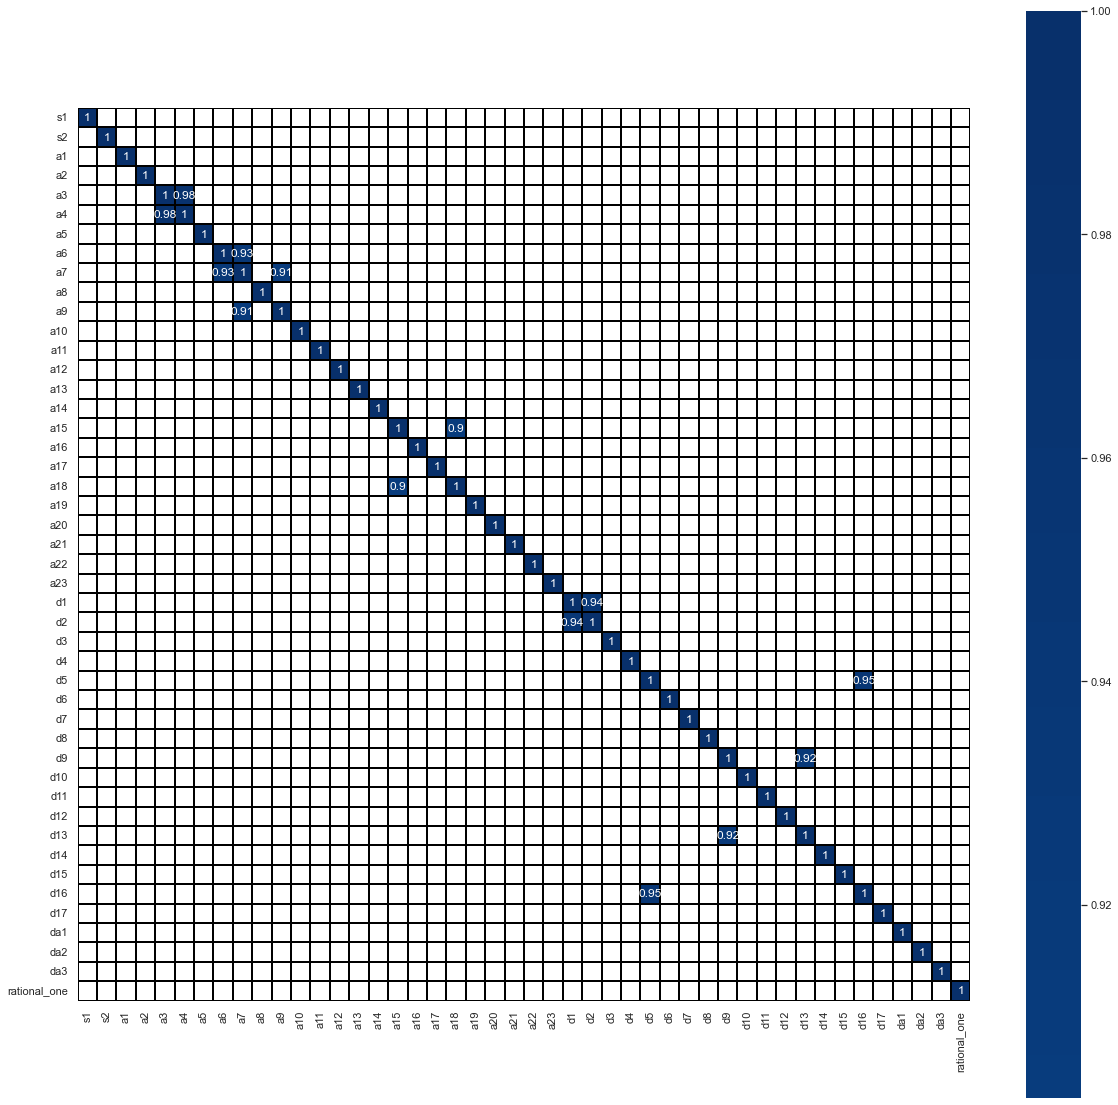

In [397]:
sns.set(style="white")
corr = dataset.corr('pearson')
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

mask = corr < 0.9

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(600, 550, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap='Blues', center=0,
            square=True, annot = True, linewidths=.2, linecolor = 'black');

In [398]:
#NOT REMOVING VARIABLES GIVES HIGHER RESULT
variables_to_remove = ['a3',  'a9', 'a15', 'a19', 'd1','d5','d9', 'd12']
dataset = dataset.drop(variables_to_remove, axis = 1)

### Data split

In [411]:
X = dataset.drop('rational_one', axis = 1)
y = dataset['rational_one']

normalizer = preprocessing.Normalizer()
normalized_X = normalizer.transform(X)


X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=42)

### linear regression

In [412]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [413]:
preds = model.predict(X_test)

#capping the predictions
preds = np.maximum(np.minimum(preds, 10.), 0.)

print('r2 score: {}'.format(model.score(X_test, y_test)))
print('root mean squared error: {}'.format(np.sqrt(mean_squared_error(y_test, preds))))
print('mean squared error: {}'.format(mean_squared_error(y_test, preds)))

r2 score: 0.6171734622086612
root mean squared error: 0.975582049243404
mean squared error: 0.9517603348059596


In [414]:
statistics.median((abs(preds - y_test)))

0.7051887568422899

In [415]:
mean_absolute_error(y_test, preds)

0.7916435552189418

In [416]:
results = pd.DataFrame(y_test)
results['prediction'] = preds
results['difference'] = abs(results.rational_one - results.prediction)
results.sort_values('difference', ascending = False)


,rational_one,prediction,difference
image_name,,,
image_41.jpg,3.0,6.331105,3.331105
image_591.jpg,3.0,5.187440,2.187440
image_359.jpg,5.6,3.498303,2.101697
image_140.jpg,7.8,5.829216,1.970784
image_94.jpg,8.5,6.551504,1.948496
...,...,...,...
image_731.jpg,8.0,7.932995,0.067005
image_108.jpg,4.8,4.866013,0.066013
image_426.jpg,6.0,6.058994,0.058994


### elastic net

In [417]:
elastic_net_model = ElasticNetCV(cv = 50).fit(X_train, y_train)

elastic_net_preds = elastic_net_model.predict(X_test)

r2_score(y_test, elastic_net_preds)

0.4876007825442574

In [418]:
elastic_net_results = pd.DataFrame(y_test)
elastic_net_results['prediction'] = elastic_net_preds
elastic_net_results['difference'] = abs(elastic_net_results.prediction - elastic_net_results.rational_one)
elastic_net_results = elastic_net_results.sort_values('difference', ascending = False)
elastic_net_results.head(20)

,rational_one,prediction,difference
image_name,,,
image_41.jpg,3.0,6.690911,3.690911
image_104.jpg,3.1,5.844727,2.744727
image_88.jpg,5.5,7.824917,2.324917
image_591.jpg,3.0,5.238449,2.238449
image_81.jpg,5.0,7.166294,2.166294
image_38.jpg,5.4,7.434981,2.034981
image_387.jpg,5.7,3.688233,2.011767
image_94.jpg,8.5,6.527867,1.972133
image_454.jpg,5.0,6.960469,1.960469


In [419]:
elastic_net_results.sort_values('prediction', ascending = False)

,rational_one,prediction,difference
image_name,,,
image_617.jpg,8.7,9.139290,0.439290
image_156.jpg,7.8,8.780172,0.980172
image_129.jpg,9.0,8.446764,0.553236
image_168.jpg,9.2,8.446402,0.753598
image_664.jpg,8.5,8.410511,0.089489
...,...,...,...
image_351.jpg,4.0,4.553391,0.553391
image_315.jpg,4.0,3.904726,0.095274
image_319.jpg,4.0,3.835480,0.164520


### cross val

In [420]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model, X, y,
                         cv=cv, n_jobs=-1)

statistics.mean(scores)

0.33041102295896824

In [421]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(elastic_net_model, X, y,
                         cv=cv, n_jobs=-1)

statistics.mean(scores)

0.5146842217604806